# Modelling - Capstone Project - Automatic Ticket Classsification - Using NLP

In [85]:
import numpy as np
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
import spacy
from spacy.tokenizer import Tokenizer
import en_core_web_md


from sklearn.model_selection import train_test_split
import re
from spacy import displacy
import string
from collections import Counter
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#load the csv as pandas Data Frame(saved final file of 1st notebook)
df = pd.read_csv(r"C:\Users\Raveena's PC\Documents\Data_Science\Capstone Project\df_modelling.csv")

In [3]:
df.head()

,Unnamed: 0,lemma_comp,sentence_length,word_count,category
0,0,debt attempt collect debt owe,1,11,4
1,1,good morning appreciate help stop chase bank...,7,103,4
2,2,upgrade card /2018 tell agent upgrade anniv...,4,74,2
3,3,trouble payment process,1,6,1
4,4,charge interest fee interest,1,8,2


In [4]:
df = df.drop(columns= "Unnamed: 0")

In [5]:
df.head()

,lemma_comp,sentence_length,word_count,category
0,debt attempt collect debt owe,1,11,4
1,good morning appreciate help stop chase bank...,7,103,4
2,upgrade card /2018 tell agent upgrade anniv...,4,74,2
3,trouble payment process,1,6,1
4,charge interest fee interest,1,8,2


In [6]:
df.shape

(78313, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   lemma_comp       78313 non-null  object
 1   sentence_length  78313 non-null  int64 
 2   word_count       78313 non-null  int64 
 3   category         78313 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.4+ MB


In [8]:
df.describe()

,sentence_length,word_count,category
count,78313.000000,78313.000000,78313.000000
mean,4.598611,76.015464,2.218048
std,8.990339,180.237712,1.076788
min,1.000000,3.000000,1.000000
25%,1.000000,6.000000,1.000000
50%,1.000000,8.000000,2.000000
75%,2.000000,50.000000,3.000000
max,265.000000,5585.000000,5.000000


In [9]:
df.category.value_counts()

1    25657
3    21963
2    21202
4     7703
5     1788
Name: category, dtype: int64

In [10]:
# Reduce the size of dataset to reduce computational issues

In [11]:
df_short = df.sample(15000, random_state = 42)

In [12]:
df_short.category.value_counts()

1    4931
3    4105
2    4086
4    1510
5     368
Name: category, dtype: int64

## Setup feature and target variables

In [13]:
# features
X = df_short.drop(columns= "category")

#Target
y = df_short["category"]

### Test Train Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11250, 3), (3750, 3), (11250,), (3750,))

Text(0.5, 1.0, 'Category count in Training set')

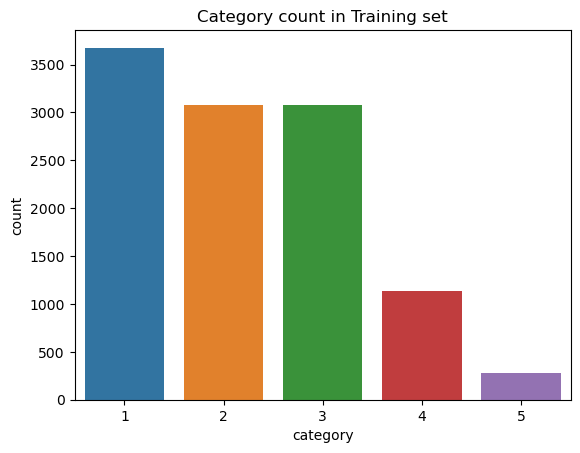

In [16]:
sns.countplot(y_train).set_title("Category count in Training set")

Text(0.5, 1.0, 'Category count in Test set')

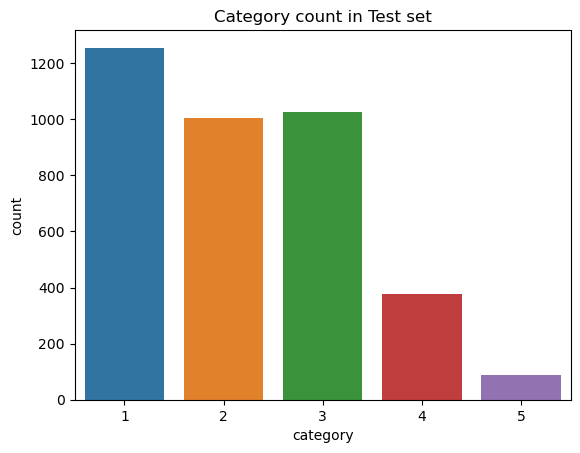

In [200]:
sns.countplot(y_test).set_title("Category count in Test set")

## Feature Engeneering - Convert words to vectors (numerical format)

### vectorize and transform X_train set 

In [17]:
X_train_text = X_train["lemma_comp"]

In [18]:
count_vec = CountVectorizer().fit(X_train_text)
count_vec_t = count_vec.transform(X_train_text)

In [19]:
tfidf_t = TfidfTransformer().fit(count_vec_t)
X_train_t = tfidf_t.transform(count_vec_t)

In [20]:
X_train_tt = X_train_t.toarray()

In [21]:
count_vec_t.shape, X_train_tt.shape

((11250, 9494), (11250, 9494))

In [22]:
#X_train_df = pd.DataFrame(X_train_tt)

In [23]:
# Add the numerical values of X_train to the transformed set
#X_train_n = X_train[["sentence_length", "word_count"]]

In [24]:
#X_train1 = pd.concat([X_train_df, X_train_n], ignore_index=True )

### vectorize and transform X_test set 

In [25]:
X_test_text = X_test["lemma_comp"]

count_vec_test = count_vec.transform(X_test_text)

#X_test_t = TfidfTransformer().fit(count_vec_test)
tfidf_test = tfidf_t.transform(count_vec_test)

X_test_tt = tfidf_test.toarray()


In [26]:
X_test_tt.shape

(3750, 9494)

# Dimension Reduction with PCA


### Scale and apply dimensionality reduction on training set

In [27]:
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train_tt)

In [28]:
pca = PCA(n_components=.90)
pca.fit(X_train_s)

PCA(n_components=0.9)

In [29]:
Xt_train= pca.transform(X_train_s)

In [30]:
Xt_train.shape

(11250, 1781)

### Scale and apply dimensionality reduction on test set

In [31]:
X_test_s = scaler.transform(X_test_tt)

In [32]:
# Transform X_test_tt
Xt_test = pca.transform(X_test_s)

In [33]:
Xt_test.shape

(3750, 1781)

# Machine Learning - Modelling

### Logistic Regression

In [34]:
#Logistic Regression
lg = LogisticRegression()
lg.fit(Xt_train, y_train)

LogisticRegression()

In [35]:
lg.score(Xt_train, y_train), lg.score(Xt_test, y_test)

(0.9813333333333333, 0.888)

In [36]:
predict_lg = lg.predict(Xt_test)

In [37]:
range(5)

range(0, 5)

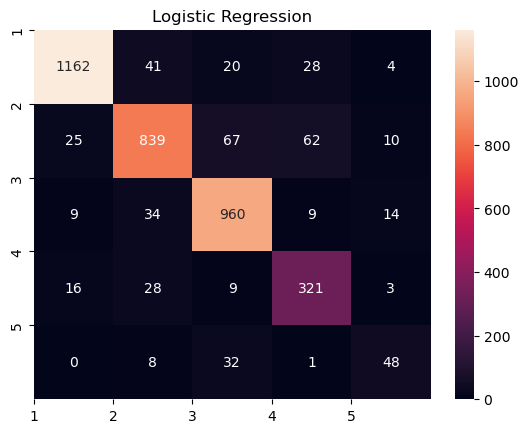

In [38]:
con_mat_lg = confusion_matrix(y_test, predict_lg)
sns.heatmap(con_mat_lg, annot = True, fmt='d').set_title('Logistic Regression')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [39]:
print("Classification Report: Logistic Regression")
print(metrics.classification_report(y_test, predict_lg, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Classification Report: Logistic Regression
              precision    recall  f1-score   support

     Class_1       0.96      0.93      0.94      1255
     Class_2       0.88      0.84      0.86      1003
     Class_3       0.88      0.94      0.91      1026
     Class_4       0.76      0.85      0.80       377
     Class_5       0.61      0.54      0.57        89

    accuracy                           0.89      3750
   macro avg       0.82      0.82      0.82      3750
weighted avg       0.89      0.89      0.89      3750



### Hyper Parameter Tuning - Logistic Regression

In [54]:
param_grid = [    
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1, 1, 10],
    'solver' : ['lbfgs','newton-cg','sag','saga']
    }
]


In [55]:
gscv = GridSearchCV(lg, param_grid = param_grid, cv = 2, verbose=True, n_jobs=-1)

In [56]:
%%time
gscv1 = gscv.fit(Xt_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Wall time: 14min 51s


In [57]:
gscv1.best_estimator_

LogisticRegression(C=0.1, solver='newton-cg')

In [58]:
gscv1.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [59]:
gscv1.score(Xt_test, y_test)

0.8973333333333333

In [60]:
predict_gscv1 = gscv1.predict(Xt_test)

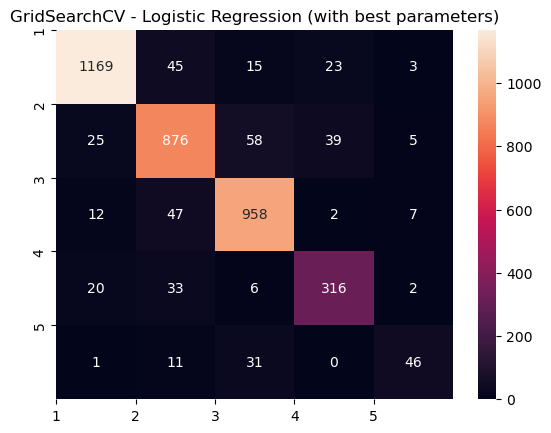

In [61]:
con_mat_gscv1 = confusion_matrix(y_test, predict_gscv1)
sns.heatmap(con_mat_gscv1, annot = True, fmt='d').set_title('GridSearchCV - Logistic Regression (with best parameters)')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

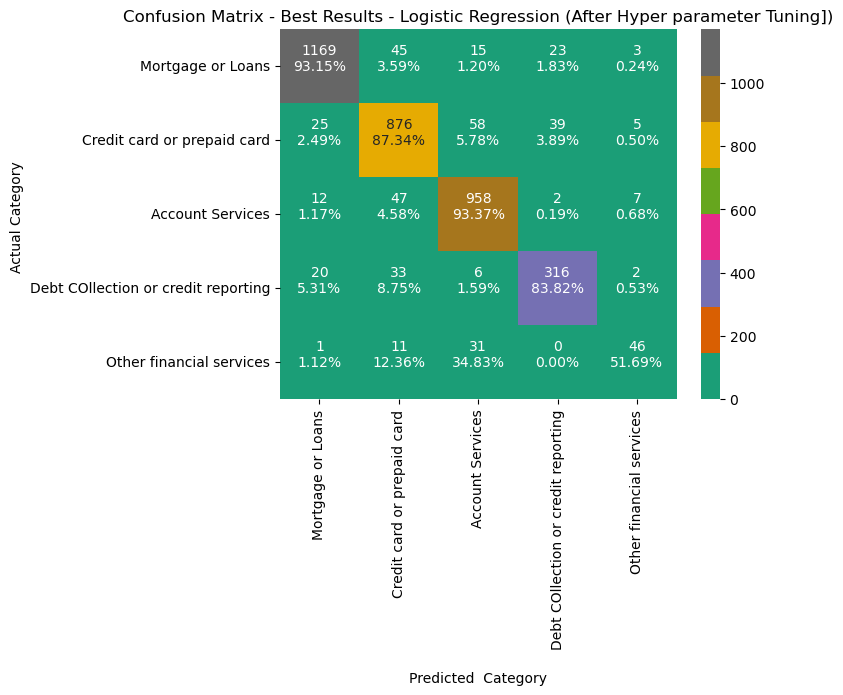

In [199]:
# Customized Confusion Matrix
counts = ["{0:0.0f}".format(value) for value in
                con_mat_gscv1.flatten()]

# to get percentage of correctly predict complains for each category
percentage_list = []
for i in range(5):
    p = (con_mat_gscv1[i] / con_mat_gscv1[i].sum())
    percentage_list.append(p)
percentage_array= np.asarray(percentage_list)
#plist = percentage_array.tolist()
percentages = ["{0:.2%}".format(value) for value in percentage_array.flatten()]



labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(counts, percentages)]

labels = np.asarray(labels).reshape(5,5)

ax = sns.heatmap(con_mat_gscv1, annot=labels, fmt='', cmap='Dark2')

ax.set_title('Confusion Matrix - Best Results - Logistic Regression (After Hyper parameter Tuning])');
ax.set_xlabel('\nPredicted  Category')
ax.set_ylabel('Actual Category ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(["Mortgage or Loans","Credit card or prepaid card", "Account Services", "Debt COllection or credit reporting", "Other financial services"])
ax.yaxis.set_ticklabels(["Mortgage or Loans","Credit card or prepaid card", "Account Services", "Debt COllection or credit reporting", "Other financial services"])
plt.xticks(rotation = 90);
plt.yticks(rotation = 360);
## Display the visualization of the Confusion Matrix.
plt.show()

In [63]:
print("GridSearchCV - Logistic Regression (with best parameters")
print(metrics.classification_report(y_test, predict_gscv1, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

GridSearchCV - Logistic Regression (with best parameters
              precision    recall  f1-score   support

     Class_1       0.95      0.93      0.94      1255
     Class_2       0.87      0.87      0.87      1003
     Class_3       0.90      0.93      0.91      1026
     Class_4       0.83      0.84      0.83       377
     Class_5       0.73      0.52      0.61        89

    accuracy                           0.90      3750
   macro avg       0.86      0.82      0.83      3750
weighted avg       0.90      0.90      0.90      3750



In [117]:
# Testing with other Params
lg1 = LogisticRegression(C= 0.01, solver='saga')
lg1.fit(Xt_train, y_train)

LogisticRegression(C=0.01, solver='saga')

In [118]:
lg1.score(Xt_test, y_test)

0.8714666666666666

### Support Vector Classifier

In [64]:
svc = SVC().fit(Xt_train, y_train)

In [65]:
predict_svc = svc.predict(Xt_test)

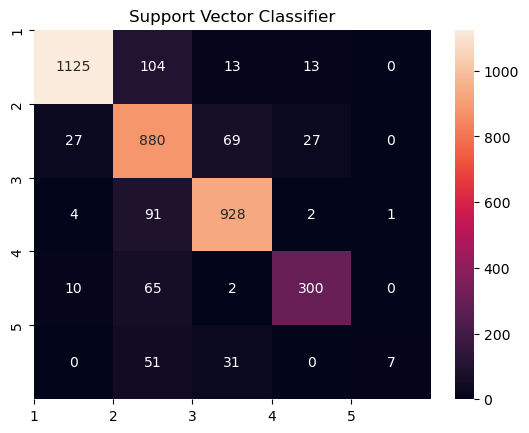

In [66]:
con_mat_svc = confusion_matrix(y_test, predict_svc)
sns.heatmap(con_mat_svc, annot = True, fmt='d').set_title('Support Vector Classifier')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [67]:
print("Classification Report: Support Vector Classifier")
print(metrics.classification_report(y_test, predict_svc, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Classification Report: Support Vector Classifier
              precision    recall  f1-score   support

     Class_1       0.96      0.90      0.93      1255
     Class_2       0.74      0.88      0.80      1003
     Class_3       0.89      0.90      0.90      1026
     Class_4       0.88      0.80      0.83       377
     Class_5       0.88      0.08      0.14        89

    accuracy                           0.86      3750
   macro avg       0.87      0.71      0.72      3750
weighted avg       0.87      0.86      0.86      3750



### Decision Tree Classifier

In [68]:
dt = DecisionTreeClassifier(min_samples_leaf = 50, criterion = "gini", random_state=5)
dt.fit(Xt_train, y_train)

DecisionTreeClassifier(min_samples_leaf=50, random_state=5)

In [69]:
predict_dt = dt.predict(Xt_test)

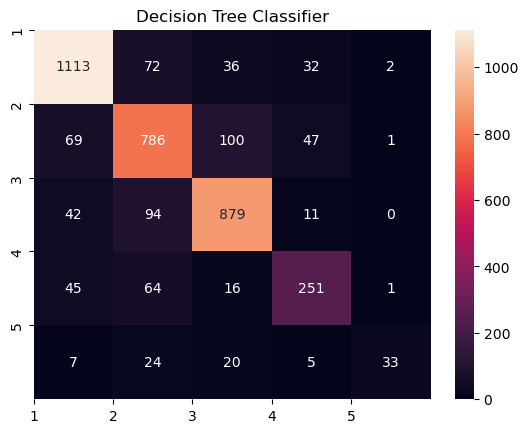

In [70]:
con_mat_dt = confusion_matrix(y_test, predict_dt)
sns.heatmap(con_mat_dt, annot = True, fmt='d').set_title('Decision Tree Classifier')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);


In [71]:
print("Classification Report: Decision Tree Classifier")
print(metrics.classification_report(y_test, predict_dt, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Classification Report: Decision Tree Classifier
              precision    recall  f1-score   support

     Class_1       0.87      0.89      0.88      1255
     Class_2       0.76      0.78      0.77      1003
     Class_3       0.84      0.86      0.85      1026
     Class_4       0.73      0.67      0.69       377
     Class_5       0.89      0.37      0.52        89

    accuracy                           0.82      3750
   macro avg       0.82      0.71      0.74      3750
weighted avg       0.82      0.82      0.81      3750



### AdaBoost Classifier

In [72]:
ada = AdaBoostClassifier(n_estimators=100, random_state=5)
ada.fit(Xt_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=5)

In [73]:
predict_ada = ada.predict(Xt_test)

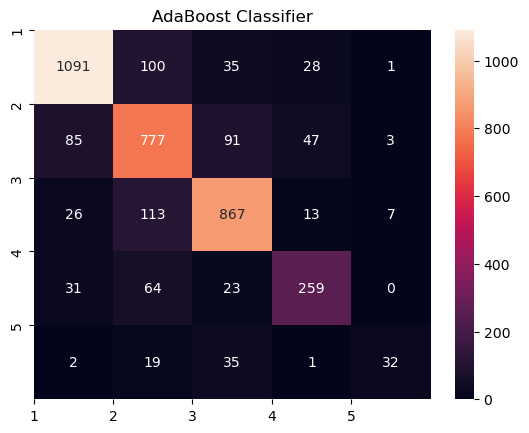

In [74]:
con_mat_ada = confusion_matrix(y_test, predict_ada)
sns.heatmap(con_mat_ada, annot = True, fmt='d').set_title('AdaBoost Classifier')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [75]:
print("Classification Report: AdaBoost Classifier")
print(metrics.classification_report(y_test, predict_ada, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Classification Report: AdaBoost Classifier
              precision    recall  f1-score   support

     Class_1       0.88      0.87      0.88      1255
     Class_2       0.72      0.77      0.75      1003
     Class_3       0.82      0.85      0.83      1026
     Class_4       0.74      0.69      0.71       377
     Class_5       0.74      0.36      0.48        89

    accuracy                           0.81      3750
   macro avg       0.78      0.71      0.73      3750
weighted avg       0.81      0.81      0.81      3750



### Gradient Boosting Classifier

In [76]:
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, min_samples_leaf = 10, random_state=5)
gb.fit(Xt_train, y_train)

GradientBoostingClassifier(learning_rate=1.0, min_samples_leaf=10,
                           random_state=5)

In [77]:
predict_gb = gb.predict(Xt_test)

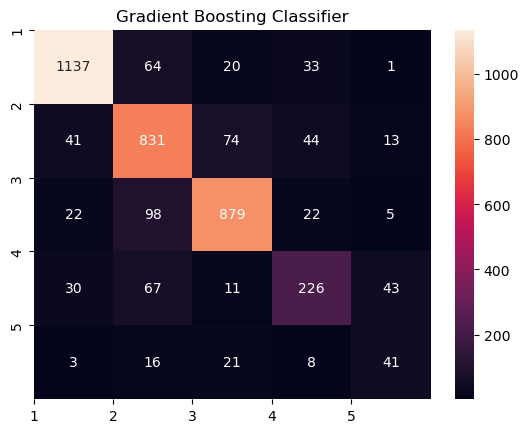

In [78]:
con_mat_gb = confusion_matrix(y_test, predict_gb)
sns.heatmap(con_mat_gb, annot = True, fmt='d').set_title('Gradient Boosting Classifier')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [79]:
print("Classification Report: Gradient Boosting Classifier")
print(metrics.classification_report(y_test, predict_gb, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Classification Report: Gradient Boosting Classifier
              precision    recall  f1-score   support

     Class_1       0.92      0.91      0.91      1255
     Class_2       0.77      0.83      0.80      1003
     Class_3       0.87      0.86      0.87      1026
     Class_4       0.68      0.60      0.64       377
     Class_5       0.40      0.46      0.43        89

    accuracy                           0.83      3750
   macro avg       0.73      0.73      0.73      3750
weighted avg       0.83      0.83      0.83      3750



### Random Forest Classifier

In [80]:
rf = RandomForestClassifier(min_samples_split= 10, warm_start = True, random_state=5)
rf.fit(Xt_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=5, warm_start=True)

In [81]:
predict_rf = rf.predict(Xt_test)

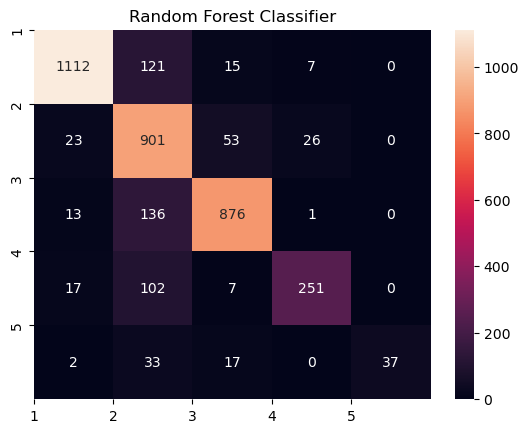

In [82]:
con_mat_rf = confusion_matrix(y_test, predict_rf)
sns.heatmap(con_mat_rf, annot = True, fmt='d').set_title('Random Forest Classifier')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [83]:
print(metrics.classification_report(y_test, predict_rf, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

              precision    recall  f1-score   support

     Class_1       0.95      0.89      0.92      1255
     Class_2       0.70      0.90      0.78      1003
     Class_3       0.90      0.85      0.88      1026
     Class_4       0.88      0.67      0.76       377
     Class_5       1.00      0.42      0.59        89

    accuracy                           0.85      3750
   macro avg       0.89      0.74      0.79      3750
weighted avg       0.87      0.85      0.85      3750



### Random Search CV with Random Forest

In [92]:
random_grid = {'n_estimators': [100, 200, 400, 500],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50, None],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False]}

In [93]:
rscv_rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [94]:
%%time
rscv_rf1 = rscv_rf.fit(Xt_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Wall time: 55min 1s


In [95]:
rscv_rf1.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=40, min_samples_split=10,
                       n_estimators=500, random_state=5, warm_start=True)

In [96]:
rscv_rf1.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [97]:
rscv_rf1.score(Xt_test, y_test)

0.8570666666666666

In [99]:
predict_rscv_rf1 = rscv_rf1.predict(Xt_test)

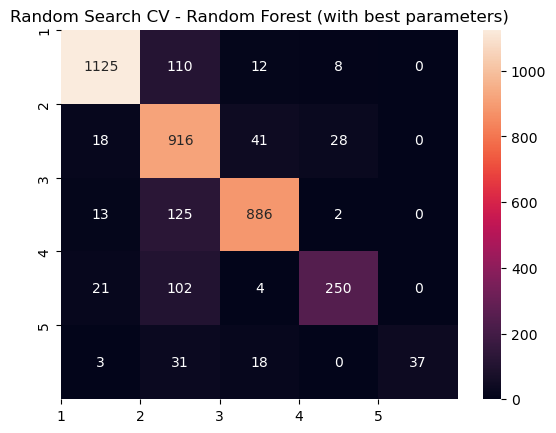

In [100]:
con_mat_rscv_rf1 = confusion_matrix(y_test, predict_rscv_rf1)
sns.heatmap(con_mat_rscv_rf1, annot = True, fmt='d').set_title('Random Search CV - Random Forest (with best parameters)')
a = [1, 2, 3, 4, 5]
plt.xticks(range(len(a)), a);
plt.yticks(range(len(a)), a);

In [101]:
print("Random Search CV - Random Forest (with best parameters)")
print(metrics.classification_report(y_test, predict_rscv_rf1, target_names=["Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]))

Random Search CV - Random Forest (with best parameters)
              precision    recall  f1-score   support

     Class_1       0.95      0.90      0.92      1255
     Class_2       0.71      0.91      0.80      1003
     Class_3       0.92      0.86      0.89      1026
     Class_4       0.87      0.66      0.75       377
     Class_5       1.00      0.42      0.59        89

    accuracy                           0.86      3750
   macro avg       0.89      0.75      0.79      3750
weighted avg       0.87      0.86      0.86      3750



### Model - Results (Accuracy)
Logistic Regression- 0.89

Support Vector Classifier - 0.86 (Performing poorly on class "Other Financial Services")

Decision Tree Classifier - 0.82

AdaBoost Classifier - 0.81

Gradient Boosting Classifier - 0.83

Random Forest Classifier - 0.85


### Model (Hyper Parameter Tuned) - Results (Accuracy)
Logistic Regression - 90%

Random Forest- 86%


## Best Model
### Logistic Regression with Accuracy of 90%


## Summary & Suggestion
With the help of proposed model now we can categorize the complaints  with 90% accuracy and this can be routed through the appropriate departments.

Financial Institutions can benefit:

Faster complaint resolution

Improved customer satisfaction

Prevent financial loss

Identify areas to improve

Win the competitors and lead the Market.


#### To Suggest
Adequate computing resources for advanced modelling to gain better results

Can be implemented in to any business sector

Unsupervised learning can be done using Topic modelling

